In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [ ]:
data=pd.read_excel('/inventory.xlsx')
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product_ID     500 non-null    object        
 1   Sale_Date      500 non-null    datetime64[ns]
 2   Category       500 non-null    object        
 3   Region         500 non-null    object        
 4   Quantity       500 non-null    int64         
 5   Unit_Cost      500 non-null    float64       
 6   Selling_Price  500 non-null    float64       
 7   Discount       500 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
data

,Product_ID,Sale_Date,Category,Region,Quantity,Unit_Cost,Selling_Price,Discount
0,P0415,2023-05-28,Clothing,South,62,249.80,456.94,31.51
1,P0463,2023-06-26,Clothing,South,69,377.40,986.74,20.63
2,P0179,2023-05-31,Books,North,30,88.69,150.71,18.27
3,P0526,2023-05-03,Clothing,North,62,422.60,835.50,31.04
4,P0195,2023-06-24,Electronics,East,45,163.55,39.23,47.80
...,...,...,...,...,...,...,...,...
495,P0048,2023-01-15,Electronics,North,31,384.77,484.16,13.57
496,P0331,2023-10-24,Furniture,East,75,196.05,401.90,44.45
497,P0100,2023-12-25,Furniture,North,75,142.89,796.97,27.39
498,P0108,2023-12-27,Furniture,South,29,43.42,772.14,40.24


In [ ]:
# Remove duplicates
data = data.drop_duplicates()

# Handle missing values
data = data.dropna(subset=["Product_ID", "Selling_Price", "Unit_Cost", "Quantity"])

numeric_cols = ["Quantity", "Unit_Cost", "Selling_Price", "Discount"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Remove invalid pricing
data = data[data["Selling_Price"] >= data["Unit_Cost"]]
data

,Product_ID,Sale_Date,Category,Region,Quantity,Unit_Cost,Selling_Price,Discount
0,P0415,2023-05-28,Clothing,South,62,249.80,456.94,31.51
1,P0463,2023-06-26,Clothing,South,69,377.40,986.74,20.63
2,P0179,2023-05-31,Books,North,30,88.69,150.71,18.27
3,P0526,2023-05-03,Clothing,North,62,422.60,835.50,31.04
5,P0938,2023-08-16,Books,East,68,120.77,780.97,23.80
...,...,...,...,...,...,...,...,...
495,P0048,2023-01-15,Electronics,North,31,384.77,484.16,13.57
496,P0331,2023-10-24,Furniture,East,75,196.05,401.90,44.45
497,P0100,2023-12-25,Furniture,North,75,142.89,796.97,27.39
498,P0108,2023-12-27,Furniture,South,29,43.42,772.14,40.24


In [ ]:
# Convert date
data["Sale_Date"] = pd.to_datetime(data["Sale_Date"], dayfirst=True, errors="coerce")
data

,Product_ID,Sale_Date,Category,Region,Quantity,Unit_Cost,Selling_Price,Discount
0,P0415,2023-05-28,Clothing,South,62,249.80,456.94,31.51
1,P0463,2023-06-26,Clothing,South,69,377.40,986.74,20.63
2,P0179,2023-05-31,Books,North,30,88.69,150.71,18.27
3,P0526,2023-05-03,Clothing,North,62,422.60,835.50,31.04
5,P0938,2023-08-16,Books,East,68,120.77,780.97,23.80
...,...,...,...,...,...,...,...,...
495,P0048,2023-01-15,Electronics,North,31,384.77,484.16,13.57
496,P0331,2023-10-24,Furniture,East,75,196.05,401.90,44.45
497,P0100,2023-12-25,Furniture,North,75,142.89,796.97,27.39
498,P0108,2023-12-27,Furniture,South,29,43.42,772.14,40.24


In [ ]:
data["Revenue"] = data["Selling_Price"] * data["Quantity"]
data["Cost"] = data["Unit_Cost"] * data["Quantity"]
data["Profit"] = data["Revenue"] - data["Cost"]
data["Profit_Margin"] = data["Profit"] / data["Revenue"]
data["Revenue"]

,Revenue
0,28330.28
1,68085.06
2,4521.30
3,51801.00
5,53105.96
...,...
495,15008.96
496,30142.50
497,59772.75
498,22392.06


In [ ]:
data["Cost"]

,Cost
0,15487.60
1,26040.60
2,2660.70
3,26201.20
5,8212.36
...,...
495,11927.87
496,14703.75
497,10716.75
498,1259.18


In [ ]:
data["Profit"]

,Profit
0,12842.68
1,42044.46
2,1860.60
3,25599.80
5,44893.60
...,...
495,3081.09
496,15438.75
497,49056.00
498,21132.88


In [ ]:
data["Profit_Margin"]

,Profit_Margin
0,0.453320
1,0.617528
2,0.411519
3,0.494195
5,0.845359
...,...
495,0.205283
496,0.512192
497,0.820708
498,0.943767


In [ ]:
data["Discounted Price"] = data["Selling_Price"] * (1 - data["Discount"])
data["Revenue"] = data["Discounted Price"] * data["Quantity"]
data["Profit"] = data["Revenue"] - data["Cost"]
data["Profit_Margin"] = data["Profit"] / data["Revenue"]
data["Discounted Price"]


,Discounted Price
0,-13941.2394
1,-19369.7062
2,-2602.7617
3,-25098.4200
5,-17806.1160
...,...
495,-6085.8912
496,-17462.5550
497,-21032.0383
498,-30298.7736


In [ ]:
data["Revenue"]

,Revenue
0,-8.643568e+05
1,-1.336510e+06
2,-7.808285e+04
3,-1.556102e+06
5,-1.210816e+06
...,...
495,-1.886626e+05
496,-1.309692e+06
497,-1.577403e+06
498,-8.786644e+05


In [ ]:
data["Profit"]

,Profit
0,-8.798444e+05
1,-1.362550e+06
2,-8.074355e+04
3,-1.582303e+06
5,-1.219028e+06
...,...
495,-2.005905e+05
496,-1.324395e+06
497,-1.588120e+06
498,-8.799236e+05


In [ ]:
data["Profit_Margin"]

,Profit_Margin
0,1.017918
1,1.019484
2,1.034075
3,1.016838
5,1.006783
...,...
495,1.063223
496,1.011227
497,1.006794
498,1.001433


In [ ]:
product_perf = data.groupby("Product_ID").agg({
    "Revenue": "sum",
    "Profit": "sum",
    "Profit_Margin": "mean"
}).reset_index()

region_perf = data.groupby("Region").agg({
    "Revenue": "sum",
    "Profit": "sum",
    "Profit_Margin": "mean"
}).reset_index()

category_perf = data.groupby("Category").agg({
    "Quantity": "sum",
    "Profit": "sum",
    "Profit_Margin": "mean"
}).reset_index()
product_perf


,Product_ID,Revenue,Profit,Profit_Margin
0,P0011,-4.316697e+03,-2.267130e+04,5.252001
1,P0013,-2.882325e+05,-2.892040e+05,1.003371
2,P0014,-3.288885e+06,-3.296736e+06,1.002387
3,P0016,-1.141459e+05,-1.478287e+05,1.295085
4,P0020,-4.929099e+05,-4.938911e+05,1.001991
...,...,...,...,...
319,P0983,-8.529022e+05,-8.704803e+05,1.013539
320,P0985,-1.653089e+05,-1.689515e+05,1.020923
321,P0986,-3.409413e+05,-3.682758e+05,1.080174
322,P0988,1.970258e+04,-1.553333e+04,-0.788391


**Discount Analysis**

In [ ]:
data['Discount Band'] = pd.cut(
    data['Discount'],
    bins=[0, 20, 40, 100],
    labels=['Low', 'Medium', 'High']
)
data

,Product_ID,Sale_Date,Category,Region,Quantity,Unit_Cost,Selling_Price,Discount,Revenue,Cost,Profit,Profit_Margin,Discounted Price,Discount Band,Month
0,P0415,2023-05-28,Clothing,South,62,249.80,456.94,31.51,-8.643568e+05,15487.60,-8.798444e+05,1.017918,-13941.2394,Medium,2023-05
1,P0463,2023-06-26,Clothing,South,69,377.40,986.74,20.63,-1.336510e+06,26040.60,-1.362550e+06,1.019484,-19369.7062,Medium,2023-06
2,P0179,2023-05-31,Books,North,30,88.69,150.71,18.27,-7.808285e+04,2660.70,-8.074355e+04,1.034075,-2602.7617,Low,2023-05
3,P0526,2023-05-03,Clothing,North,62,422.60,835.50,31.04,-1.556102e+06,26201.20,-1.582303e+06,1.016838,-25098.4200,Medium,2023-05
5,P0938,2023-08-16,Books,East,68,120.77,780.97,23.80,-1.210816e+06,8212.36,-1.219028e+06,1.006783,-17806.1160,Medium,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,P0048,2023-01-15,Electronics,North,31,384.77,484.16,13.57,-1.886626e+05,11927.87,-2.005905e+05,1.063223,-6085.8912,Low,2023-01
496,P0331,2023-10-24,Furniture,East,75,196.05,401.90,44.45,-1.309692e+06,14703.75,-1.324395e+06,1.011227,-17462.5550,High,2023-10
497,P0100,2023-12-25,Furniture,North,75,142.89,796.97,27.39,-1.577403e+06,10716.75,-1.588120e+06,1.006794,-21032.0383,Medium,2023-12
498,P0108,2023-12-27,Furniture,South,29,43.42,772.14,40.24,-8.786644e+05,1259.18,-8.799236e+05,1.001433,-30298.7736,High,2023-12


**Time Based Analysis**

In [ ]:
data["Month"] = data["Sale_Date"].dt.to_period("M")

monthly_perf = data.groupby("Month").agg({
    "Revenue": "sum",
    "Profit_Margin": "mean"
}).reset_index()

monthly_perf["Month"] = monthly_perf["Month"].astype(str)
data["Month"]


,Month
0,2023-05
1,2023-06
2,2023-05
3,2023-05
5,2023-08
...,...
495,2023-01
496,2023-10
497,2023-12
498,2023-12


**Revenue vs Profitability by Product**

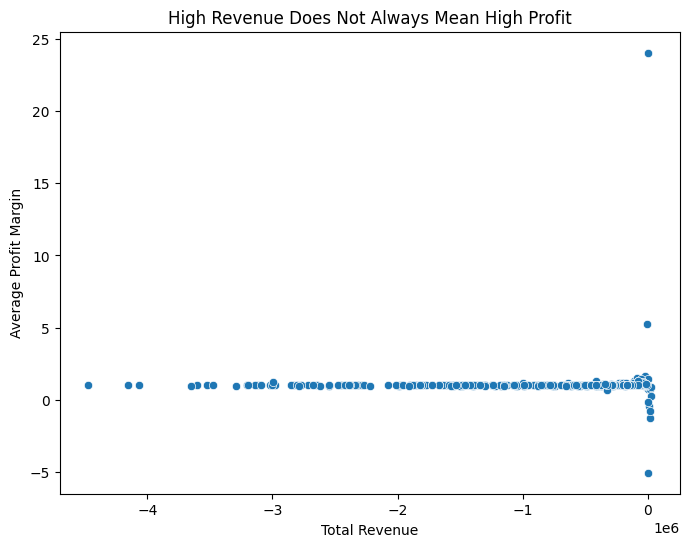

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=product_perf,
    x="Revenue",
    y="Profit_Margin"
)
plt.title("High Revenue Does Not Always Mean High Profit")
plt.xlabel("Total Revenue")
plt.ylabel("Average Profit Margin")
plt.show()


**Discount Impact on Profit Margin**

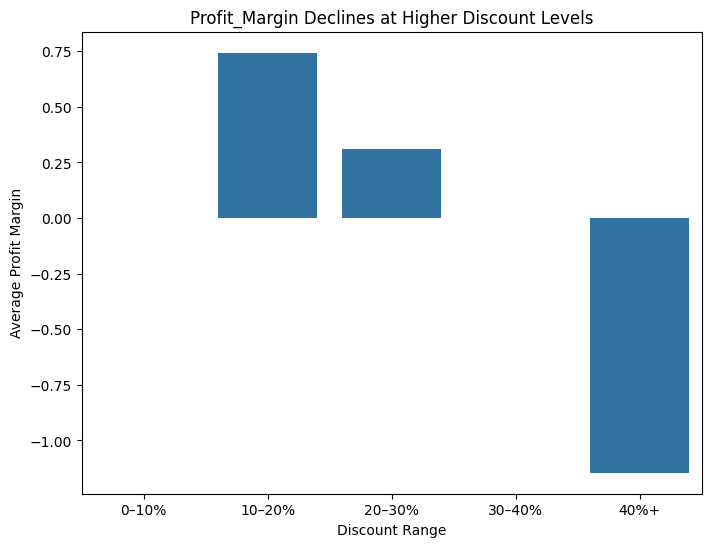

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=discount_perf,
    x="Discount Band",
    y="Profit_Margin"
)
plt.title("Profit_Margin Declines at Higher Discount Levels")
plt.xlabel("Discount Range")
plt.ylabel("Average Profit Margin")
plt.show()


**Regional Revenue vs Profit Margin**

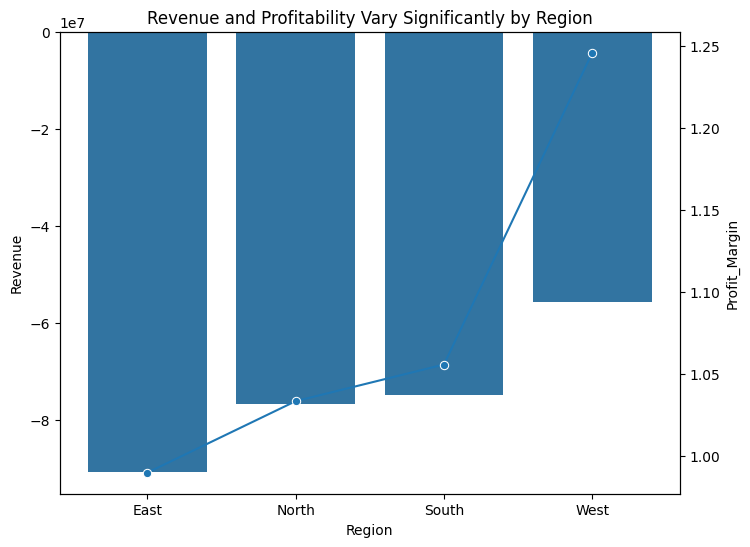

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6))

sns.barplot(
    data=region_perf,
    x="Region",
    y="Revenue",
    ax=ax1
)

ax2 = ax1.twinx()
sns.lineplot(
    data=region_perf,
    x="Region",
    y="Profit_Margin",
    marker="o",
    ax=ax2
)

ax1.set_title("Revenue and Profitability Vary Significantly by Region")
ax1.set_ylabel("Revenue")
ax2.set_ylabel("Profit_Margin")

plt.show()


**Revenue Concentration**

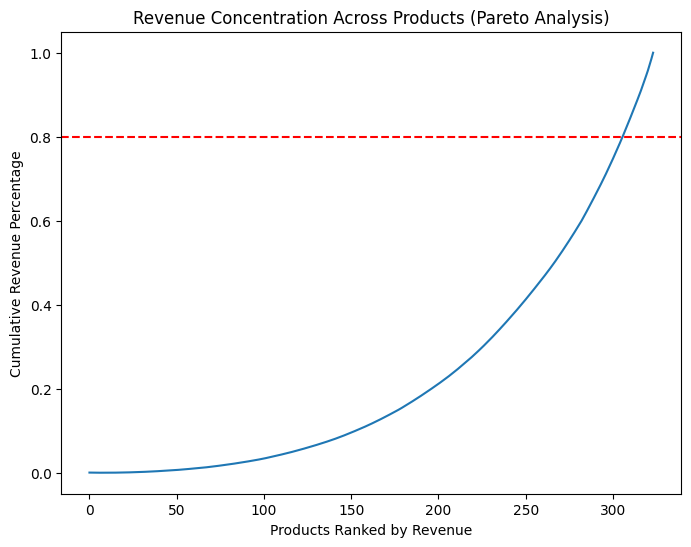

In [ ]:
product_perf = product_perf.sort_values("Revenue", ascending=False)
product_perf["Cumulative Revenue %"] = (
    product_perf["Revenue"].cumsum() / product_perf["Revenue"].sum()
)

plt.figure(figsize=(8,6))
plt.plot(product_perf["Cumulative Revenue %"].values)
plt.axhline(0.8, color="red", linestyle="--")
plt.title("Revenue Concentration Across Products (Pareto Analysis)")
plt.ylabel("Cumulative Revenue Percentage")
plt.xlabel("Products Ranked by Revenue")
plt.show()


In [ ]:
product_perf = data.groupby('Product_ID').agg({
    'Revenue': 'sum',
    'Profit_Margin': 'mean'
}).reset_index()
product_perf

,Product_ID,Revenue,Profit_Margin
0,P0011,-4.316697e+03,5.252001
1,P0013,-2.882325e+05,1.003371
2,P0014,-3.288885e+06,1.002387
3,P0016,-1.141459e+05,1.295085
4,P0020,-4.929099e+05,1.001991
...,...,...,...
319,P0983,-8.529022e+05,1.013539
320,P0985,-1.653089e+05,1.020923
321,P0986,-3.409413e+05,1.080174
322,P0988,1.970258e+04,-0.788391


In [ ]:
avg_margin = product_perf['Profit_Margin'].mean()
avg_margin

np.float64(1.0839900987031899)

In [ ]:
top_products = product_perf.sort_values('Revenue', ascending=False).head(10)
top_products

,Product_ID,Revenue,Profit_Margin
222,P0672,29451.1210,0.278447
155,P0461,26315.5200,0.917949
322,P0988,19702.5750,-0.788391
85,P0259,19605.4560,0.760581
197,P0590,15772.6800,-1.247963
148,P0445,11545.0230,-0.409729
8,P0030,2788.1600,0.743343
274,P0854,2160.9300,-0.159339
47,P0148,1711.2546,-5.027437
106,P0316,-672.3852,24.019052


In [ ]:
below_avg = top_products[top_products['Profit_Margin'] < avg_margin]

percentage_below = (len(below_avg) / len(top_products)) * 100

print(round(percentage_below,2))


90.0


In [ ]:
data['Discount Band'] = pd.cut(
    data['Discount'],
    bins=[0, 0.1, 0.3, 1],
    labels=['Low', 'Medium', 'High']
)
data

,Product_ID,Sale_Date,Category,Region,Quantity,Unit_Cost,Selling_Price,Discount,Revenue,Cost,Profit,Profit_Margin,Discounted Price,Discount Band,Month
0,P0415,2023-05-28,Clothing,South,62,249.80,456.94,31.51,-8.643568e+05,15487.60,-8.798444e+05,1.017918,-13941.2394,NaN,2023-05
1,P0463,2023-06-26,Clothing,South,69,377.40,986.74,20.63,-1.336510e+06,26040.60,-1.362550e+06,1.019484,-19369.7062,NaN,2023-06
2,P0179,2023-05-31,Books,North,30,88.69,150.71,18.27,-7.808285e+04,2660.70,-8.074355e+04,1.034075,-2602.7617,NaN,2023-05
3,P0526,2023-05-03,Clothing,North,62,422.60,835.50,31.04,-1.556102e+06,26201.20,-1.582303e+06,1.016838,-25098.4200,NaN,2023-05
5,P0938,2023-08-16,Books,East,68,120.77,780.97,23.80,-1.210816e+06,8212.36,-1.219028e+06,1.006783,-17806.1160,NaN,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,P0048,2023-01-15,Electronics,North,31,384.77,484.16,13.57,-1.886626e+05,11927.87,-2.005905e+05,1.063223,-6085.8912,NaN,2023-01
496,P0331,2023-10-24,Furniture,East,75,196.05,401.90,44.45,-1.309692e+06,14703.75,-1.324395e+06,1.011227,-17462.5550,NaN,2023-10
497,P0100,2023-12-25,Furniture,North,75,142.89,796.97,27.39,-1.577403e+06,10716.75,-1.588120e+06,1.006794,-21032.0383,NaN,2023-12
498,P0108,2023-12-27,Furniture,South,29,43.42,772.14,40.24,-8.786644e+05,1259.18,-8.799236e+05,1.001433,-30298.7736,NaN,2023-12


In [ ]:
data['Revenue'] = data['Quantity'] * data['Selling_Price'] * (1 - data['Discount']/100)
data

,Product_ID,Sale_Date,Category,Region,Quantity,Unit_Cost,Selling_Price,Discount,Revenue,Cost,Profit,Profit_Margin,Discounted Price,Discount Band,Month
0,P0415,2023-05-28,Clothing,South,62,249.80,456.94,31.51,19403.408772,15487.60,-8.798444e+05,1.017918,-13941.2394,Medium,2023-05
1,P0463,2023-06-26,Clothing,South,69,377.40,986.74,20.63,54039.112122,26040.60,-1.362550e+06,1.019484,-19369.7062,Medium,2023-06
2,P0179,2023-05-31,Books,North,30,88.69,150.71,18.27,3695.258490,2660.70,-8.074355e+04,1.034075,-2602.7617,Low,2023-05
3,P0526,2023-05-03,Clothing,North,62,422.60,835.50,31.04,35721.969600,26201.20,-1.582303e+06,1.016838,-25098.4200,Medium,2023-05
5,P0938,2023-08-16,Books,East,68,120.77,780.97,23.80,40466.741520,8212.36,-1.219028e+06,1.006783,-17806.1160,Medium,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,P0048,2023-01-15,Electronics,North,31,384.77,484.16,13.57,12972.244128,11927.87,-2.005905e+05,1.063223,-6085.8912,Low,2023-01
496,P0331,2023-10-24,Furniture,East,75,196.05,401.90,44.45,16744.158750,14703.75,-1.324395e+06,1.011227,-17462.5550,High,2023-10
497,P0100,2023-12-25,Furniture,North,75,142.89,796.97,27.39,43400.993775,10716.75,-1.588120e+06,1.006794,-21032.0383,Medium,2023-12
498,P0108,2023-12-27,Furniture,South,29,43.42,772.14,40.24,13381.495056,1259.18,-8.799236e+05,1.001433,-30298.7736,High,2023-12


In [ ]:
data['Profit'] = data['Revenue'] - data['Cost']
data['Profit_Margin'] = data['Profit'] / data['Revenue']
data['Profit']

,Profit
0,3915.808772
1,27998.512122
2,1034.558490
3,9520.769600
5,32254.381520
...,...
495,1044.374128
496,2040.408750
497,32684.243775
498,12122.315056


In [ ]:
data['Profit_Margin']

,Profit_Margin
0,0.201810
1,0.518116
2,0.279969
3,0.266524
5,0.797059
...,...
495,0.080508
496,0.121858
497,0.753076
498,0.905901


In [ ]:
region_perf = data.groupby('Region').agg({
    'Revenue': 'sum',
    'Profit_Margin': 'mean'
}).reset_index()
region_perf

,Region,Revenue,Profit_Margin
0,East,2.506213e+06,0.411831
1,North,2.316513e+06,0.415729
2,South,2.324111e+06,0.437858
3,West,2.196195e+06,0.379294


In [ ]:
top_revenue_region = region_perf.loc[region_perf['Revenue'].idxmax(), 'Region']

top_margin_region = region_perf.loc[region_perf['Profit_Margin'].idxmax(), 'Region']

print(top_revenue_region)
print(top_margin_region)


East
South


In [ ]:
pareto = product_perf.sort_values('Revenue', ascending=False)
pareto

,Product_ID,Revenue,Profit_Margin
222,P0672,2.945112e+04,0.278447
155,P0461,2.631552e+04,0.917949
322,P0988,1.970258e+04,-0.788391
85,P0259,1.960546e+04,0.760581
197,P0590,1.577268e+04,-1.247963
...,...,...,...
230,P0711,-3.605837e+06,1.019250
280,P0871,-3.649274e+06,1.001848
276,P0861,-4.064612e+06,1.004894
17,P0054,-4.157730e+06,1.017210


In [ ]:
pareto['Cumulative Revenue'] = pareto['Revenue'].cumsum()

total_revenue = pareto['Revenue'].sum()

pareto['Cumulative Percentage'] = pareto['Cumulative Revenue'] / total_revenue * 100
pareto['Cumulative Revenue']

,Cumulative Revenue
222,2.945112e+04
155,5.576664e+04
322,7.546922e+04
85,9.507467e+04
197,1.108474e+05
...,...
230,-2.813557e+08
280,-2.850050e+08
276,-2.890696e+08
17,-2.932273e+08


In [ ]:
top_contributors = pareto[pareto['Cumulative Percentage'] <= 80]

pareto_percentage = (len(top_contributors) / len(pareto)) * 100

print(round(pareto_percentage,2))


94.44
